<a href="https://colab.research.google.com/github/drewamorbordelon/DS-Unit-2-Applied-Modeling/blob/master/module1-define-ml-problems/231_10yrTreasuryModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import sys

!pip install category_encoders==2.*

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest

In [ ]:
df = pd.read_csv('/content/MoM_Unit2ProjectDataFrame.csv', parse_dates=['date'], skipfooter=1, engine='python')

In [ ]:
df['vix_basket'] = df['vix']
df = df.iloc[217:]

In [ ]:
df.head()

,date,cpi,roccpi,roccpi_bps,10y2yr,roc10_2,10y2y_bps,10y,roc10y,10y_bps,vehicle sales,roc_vs,vs_bps,pmi,roc_pmi,rocpmi_bps,crb,dxy,roc_dxy,rocdxy_bps,savings,roc_savings,rocsave_bps,con_conf,vix,vix_basket
217,1994-02-01,154.8,2.788845,-14.253446,1.48,-29.857820,-200.393863,6.15,1.990050,1278.817182,15.520,19.669982,538.745273,65.1383,3.196743,-8.187811,118.03,94.55,0.531632,-285.361556,1226.8,3.075113,-22.816457,93.2,14.87,14.87
218,1994-03-01,155.3,2.984085,19.524026,1.56,-24.637681,522.013875,6.77,12.271973,1028.192371,15.301,14.820651,-484.933091,66.0163,4.852187,165.544424,118.45,93.06,1.295309,76.367648,1226.4,3.206261,13.114762,91.5,20.45,20.45
219,1994-04-01,155.5,2.708058,-27.602676,1.33,-40.090090,-1545.240893,7.06,16.694215,442.224141,16.013,10.229228,-459.142303,66.5980,5.159607,30.742041,122.47,92.12,2.938876,164.356726,1220.8,2.570996,-63.526457,92.6,13.77,13.77
220,1994-05-01,155.9,2.700922,-0.713586,1.16,-39.583333,50.675676,7.17,16.396104,-29.811098,14.577,0.399477,-982.975178,67.0655,5.971927,81.232009,130.67,92.52,3.861697,92.282150,1220.6,1.513639,-105.735708,92.8,13.03,13.03
221,1994-06-01,156.4,2.827087,12.616518,1.15,-35.028249,455.508475,7.34,26.551724,1015.562024,15.109,4.271912,387.243512,67.2836,6.548216,57.628823,135.20,89.62,-4.282815,-814.451269,1212.8,0.697443,-81.619668,91.2,14.97,14.97


In [ ]:
df['vix_basket'].value_counts()
df.head()

,date,cpi,roccpi,roccpi_bps,10y2yr,roc10_2,10y2y_bps,10y,roc10y,10y_bps,vehicle sales,roc_vs,vs_bps,pmi,roc_pmi,rocpmi_bps,crb,dxy,roc_dxy,rocdxy_bps,savings,roc_savings,rocsave_bps,con_conf,vix,vix_basket
217,1994-02-01,154.8,2.788845,-14.253446,1.48,-29.857820,-200.393863,6.15,1.990050,1278.817182,15.520,19.669982,538.745273,65.1383,3.196743,-8.187811,118.03,94.55,0.531632,-285.361556,1226.8,3.075113,-22.816457,93.2,14.87,14.87
218,1994-03-01,155.3,2.984085,19.524026,1.56,-24.637681,522.013875,6.77,12.271973,1028.192371,15.301,14.820651,-484.933091,66.0163,4.852187,165.544424,118.45,93.06,1.295309,76.367648,1226.4,3.206261,13.114762,91.5,20.45,20.45
219,1994-04-01,155.5,2.708058,-27.602676,1.33,-40.090090,-1545.240893,7.06,16.694215,442.224141,16.013,10.229228,-459.142303,66.5980,5.159607,30.742041,122.47,92.12,2.938876,164.356726,1220.8,2.570996,-63.526457,92.6,13.77,13.77
220,1994-05-01,155.9,2.700922,-0.713586,1.16,-39.583333,50.675676,7.17,16.396104,-29.811098,14.577,0.399477,-982.975178,67.0655,5.971927,81.232009,130.67,92.52,3.861697,92.282150,1220.6,1.513639,-105.735708,92.8,13.03,13.03
221,1994-06-01,156.4,2.827087,12.616518,1.15,-35.028249,455.508475,7.34,26.551724,1015.562024,15.109,4.271912,387.243512,67.2836,6.548216,57.628823,135.20,89.62,-4.282815,-814.451269,1212.8,0.697443,-81.619668,91.2,14.97,14.97


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318 entries, 217 to 534
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           318 non-null    datetime64[ns]
 1   cpi            318 non-null    float64       
 2   roccpi         318 non-null    float64       
 3   roccpi_bps     318 non-null    float64       
 4   10y2yr         318 non-null    float64       
 5   roc10_2        318 non-null    float64       
 6   10y2y_bps      318 non-null    float64       
 7   10y            318 non-null    float64       
 8   roc10y         318 non-null    float64       
 9   10y_bps        318 non-null    float64       
 10  vehicle sales  318 non-null    float64       
 11  roc_vs         318 non-null    float64       
 12  vs_bps         318 non-null    float64       
 13  pmi            318 non-null    float64       
 14  roc_pmi        318 non-null    float64       
 15  rocpmi_bps     318 no

#Wrangle Function

In [ ]:
def wrangle (df):

  df = df.copy()
  
  # NEW FEATURES = Creating baskets for VIX levels
  # create baskets for VIX
  # >= 30
  # 30-18
  # < 18

  # Creating a new column with categories
  defensive = (df['vix_basket'] >= 30.00)
  tradable = (df['vix_basket'] < 30.00) & (df['vix_basket'] >= 16.00)
  investable = (df['vix_basket'] < 16.00)
  # unknown = (df['vix_basket'] < 30.00) & (df['vix_basket'] > 27.00) & (df['vix_basket'] < 18.00) & (df(['vix_basket'] >= 15.00)

  # NEW Category Features
  df.loc[defensive, 'vix_basket'] = 'defensive'
  df.loc[tradable, 'vix_basket'] = 'tradable'
  df.loc[investable, 'vix_basket'] = 'investable'
  # df.loc[unknown, 'vix_basket'] = 'unknown'

  # NEW FEATURES = Creating conditional statement for the `Regime`
  condition1 = (df['roccpi_bps'] < 0.00)
  regime1 = df[condition1]
  regime1_date = regime1[['date']]
  regime1_date['regime'] = 'regime 1,3'

  condition2 = (df['roccpi_bps'] > 0.00)
  regime2 = df[condition2]
  regime2_date = regime2[['date']]
  regime2_date['regime'] = 'regime 2,4'

  by_row_1 = pd.concat([regime1_date, regime2_date])
  df = pd.merge(df, by_row_1, on='date', how='inner')

  # Drop recorded_by (never varies) and id (always varies, random)
  unusable_variance = ['10y2yr', 'roc10_2', '10y2y_bps', 'roc10y', '10y_bps']

  df = df.drop(columns=unusable_variance,  axis=1)  #'cpi', 'gdp', 'rocgdp_bps', 'rocgdp', 'roccpi_bps', 'roccpi','vehicle_sales', 'conjob_claims', 'Indust Prod Index', 'm2vel',, '10y2yr', '10y', 'wti','dxy'
  
  return df

In [ ]:
df = wrangle(df).sort_index()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
df.tail()

,date,cpi,roccpi,roccpi_bps,10y,vehicle sales,roc_vs,vs_bps,pmi,roc_pmi,rocpmi_bps,crb,dxy,roc_dxy,rocdxy_bps,savings,roc_savings,rocsave_bps,con_conf,vix,vix_basket,regime
313,2020-03-01,266.795,2.096304,-26.937099,0.70,11.809,-33.768929,-3444.737069,100.8026,-5.172839,-496.864463,121.79,99.05,1.819490,-22.917875,10462.7,12.094752,504.760654,89.1,53.54,defensive,"regime 1,3"
314,2020-04-01,265.601,1.438310,-65.799410,0.64,9.089,-47.018362,-1324.943322,84.5913,-19.722568,-1454.972961,117.20,99.57,2.144030,32.453941,10908.7,17.299111,520.435834,71.8,34.15,defensive,"regime 1,3"
315,2020-05-01,265.441,1.236465,-20.184495,0.65,12.440,-30.354943,1666.341854,87.8986,-16.685845,303.672364,132.24,98.34,0.603581,-154.044898,11269.8,19.939976,264.086499,72.3,27.51,tradable,"regime 1,3"
316,2020-06-01,266.065,1.194257,-4.220852,0.66,13.359,-24.695603,565.934030,94.6167,-10.821074,586.477053,137.97,97.39,1.310725,70.714450,11386.8,20.346238,40.626226,78.1,30.43,defensive,"regime 1,3"
317,2020-07-01,267.715,1.566086,37.182942,0.55,15.006,-14.383523,1031.208059,98.3754,-6.918340,390.273402,143.69,93.35,-5.247665,-655.839051,11425.1,20.247756,-9.848242,72.5,24.46,tradable,"regime 2,4"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 318 entries, 0 to 317
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           318 non-null    datetime64[ns]
 1   cpi            318 non-null    float64       
 2   roccpi         318 non-null    float64       
 3   roccpi_bps     318 non-null    float64       
 4   10y            318 non-null    float64       
 5   vehicle sales  318 non-null    float64       
 6   roc_vs         318 non-null    float64       
 7   vs_bps         318 non-null    float64       
 8   pmi            318 non-null    float64       
 9   roc_pmi        318 non-null    float64       
 10  rocpmi_bps     318 non-null    float64       
 11  crb            318 non-null    float64       
 12  dxy            318 non-null    float64       
 13  roc_dxy        318 non-null    float64       
 14  rocdxy_bps     318 non-null    float64       
 15  savings        318 non-

In [ ]:
# Set `date` as index
df = df.set_index('date')

#Split TV from FM

In [ ]:
# target is the regime column
# categorical
target = '10y'
y = df[target]
X = df.drop(target , axis=1)

In [ ]:
cutoff1 = '2018-01-01'
# cutoff2 = '2010-01-01'
# mask1 = df.index < cutoff2
mask1 = (df.index <= cutoff1)
# mask2 = (df.index >= cutoff1) & (df.index < cutoff2)
# mask3 = df.index >= cutoff2
train = df[mask1]
val = df[~mask1]
# val = df[mask2]
# test = df[mask3]

In [ ]:
y_train = train[target]
X_train = train.drop([target], axis=1)

y_val = val[target]
X_val = val.drop(target, axis=1)

# y_test = test[target]
# X_test = test.drop(target, axis=1)

###Test with assert

In [ ]:
assert df.shape[0] == train.shape[0] + val.shape[0]
# assert df.shape[0] == train.shape[0] + val.shape[0] + test.shape[0]

In [ ]:
print(train.shape)
print(val.shape)
# print(test.shape)

(288, 21)
(30, 21)


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 288 entries, 1994-02-01 to 2018-01-01
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cpi            288 non-null    float64
 1   roccpi         288 non-null    float64
 2   roccpi_bps     288 non-null    float64
 3   10y            288 non-null    float64
 4   vehicle sales  288 non-null    float64
 5   roc_vs         288 non-null    float64
 6   vs_bps         288 non-null    float64
 7   pmi            288 non-null    float64
 8   roc_pmi        288 non-null    float64
 9   rocpmi_bps     288 non-null    float64
 10  crb            288 non-null    float64
 11  dxy            288 non-null    float64
 12  roc_dxy        288 non-null    float64
 13  rocdxy_bps     288 non-null    float64
 14  savings        288 non-null    float64
 15  roc_savings    288 non-null    float64
 16  rocsave_bps    288 non-null    float64
 17  con_conf       288 non-null    floa

In [ ]:
val.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30 entries, 2018-02-01 to 2020-07-01
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cpi            30 non-null     float64
 1   roccpi         30 non-null     float64
 2   roccpi_bps     30 non-null     float64
 3   10y            30 non-null     float64
 4   vehicle sales  30 non-null     float64
 5   roc_vs         30 non-null     float64
 6   vs_bps         30 non-null     float64
 7   pmi            30 non-null     float64
 8   roc_pmi        30 non-null     float64
 9   rocpmi_bps     30 non-null     float64
 10  crb            30 non-null     float64
 11  dxy            30 non-null     float64
 12  roc_dxy        30 non-null     float64
 13  rocdxy_bps     30 non-null     float64
 14  savings        30 non-null     float64
 15  roc_savings    30 non-null     float64
 16  rocsave_bps    30 non-null     float64
 17  con_conf       30 non-null     float

#Establish Baseline

In [ ]:
# Regression --> mean absolute error
from sklearn.metrics import mean_absolute_error
print('Baseline MAE:') 
print(mean_absolute_error(y_train, [y_train.mean()]*len(y_train)))


Baseline MAE:
1.3895833333333334


#Build Model

In [ ]:
model = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    SelectKBest(k=6),
    LinearRegression()  #LinearRegression()  RandomForestRegressor(random_state=42)
)

model.fit(X_train, y_train);

In [ ]:
print('Training MAE:', mean_absolute_error(y_train, model.predict(X_train)))
print('Validation MAE:', mean_absolute_error(y_val, model.predict(X_val)))
# print('Test MAE:', mean_absolute_error(y_test, model.predict(X_test)))

Training MAE: 0.4461965981656473
Validation MAE: 0.6765188439321287


In [ ]:

from sklearn.metrics import r2_score


print("Training R2:", model.score(X_train, y_train))
print("Validation R2:", model.score(X_val, y_val))
# print("Test R2:", model.score(X_test, y_test))

Training R2: 0.8902504396749649
Validation R2: 0.07939026438538832


In [ ]:
model_rfr = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    SelectKBest(k=6), # <-- Hyperparameter
    RandomForestRegressor(n_estimators=10000, n_jobs=-1, random_state=42) # <-- max_depth, n_estimators
)

model_rfr.fit(X_train, y_train);

In [ ]:
print('Training MAE:', mean_absolute_error(y_train, model_rfr.predict(X_train)))
print('Validation MAE:', mean_absolute_error(y_val, model_rfr.predict(X_val)))
# print('Test MAE:', mean_absolute_error(y_test, model_rfr.predict(X_test)))

Training MAE: 0.07862385763891938
Validation MAE: 0.6928530333332835


In [ ]:
rfr_model = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    SimpleImputer(strategy='mean'),
    SelectKBest(k=8),
    RandomForestRegressor(random_state=42)
)
# The ranges I want to test as dictionary
params= {'randomforestregressor__n_estimators': range(50, 801, 50),
         'randomforestregressor__max_depth': range(5, 501, 10)}

# Create Grid Search
gs = GridSearchCV(rfr_model,
                  param_grid = params,
                  n_jobs=-1,
                  verbose=1, 
                  cv=10
)

In [ ]:
gs.fit(X_train, y_train);

Fitting 10 folds for each of 800 candidates, totalling 8000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed: 14.8min
[Parallel(n_jobs=-1)]: Done 1796 tasks      | elapsed: 21.4min
[Parallel(n_jobs=-1)]: Done 2446 tasks      | elapsed: 29.4min
[Parallel(n_jobs=-1)]: Done 3196 tasks      | elapsed: 38.9min
[Parallel(n_jobs=-1)]: Done 4046 tasks      | elapsed: 48.9min
[Parallel(n_jobs=-1)]: Done 4996 tasks      | elapsed: 60.5min
[Parallel(n_jobs=-1)]: Done 6046 tasks      | elapsed: 73.3min
[Parallel(n_jobs=-1)]: Done 7196 tasks      | elapsed: 87.7min
[Parallel(n_jobs=-1)]: Done 8000 out of 8000 | elapsed: 97.6min finished


In [ ]:
# # What are the best set of hyperparameters?
gs.best_params_

{'randomforestregressor__max_depth': 5,
 'randomforestregressor__n_estimators': 50}

In [ ]:
# What if I want to save my best model?
best_model = gs.best_estimator_

In [ ]:
print('Tuned training MAE:', mean_absolute_error(y_train, gs.predict(X_train)))
print('Tuned validation MAE:', mean_absolute_error(y_val, gs.predict(X_val)))
# print('Tuned test MAE:', mean_absolute_error(y_test, gs.predict(X_test)))

Tuned training MAE: 0.15581883199217905
Tuned validation MAE: 0.7373593393410331


In [ ]:
# # Multiple Linear Regression
from sklearn.metrics import r2_score


print("Training R2:", model_1.score(X_train, y_train))
print("Validation R2:", model_1.score(X_val, y_val))
# print("Test R2:", model_1.score(X_test, y_test))

Training R2: 0.8698029098500252
Validation R2: -0.6888794447594713


In [ ]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
X, y = make_classification(n_samples=1000,
                           n_features=10,
                           n_informative=3,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)

In [ ]:
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

In [ ]:
forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

Feature ranking:
1. feature 1 (0.295902)
2. feature 2 (0.208351)
3. feature 0 (0.177632)
4. feature 3 (0.047121)
5. feature 6 (0.046303)
6. feature 8 (0.046013)
7. feature 7 (0.045575)
8. feature 4 (0.044614)
9. feature 9 (0.044577)
10. feature 5 (0.043912)


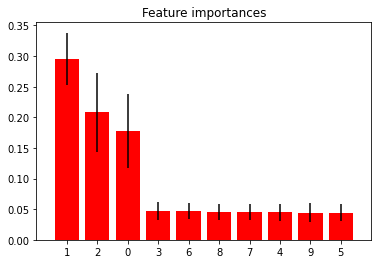

In [ ]:
# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

[05:48:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


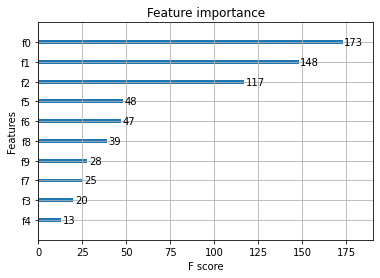

In [ ]:
# plot feature importance using built-in function
from numpy import loadtxt
from xgboost import XGBRegressor
from xgboost import plot_importance

# fit model no training data
model = XGBRegressor()
model.fit(X, y)
# plot feature importance
plot_importance(model)
plt.show()